In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from imblearn.metrics import specificity_score

In [3]:
data = pd.read_csv("archive/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
Index                  11054 non-null int64
UsingIP                11054 non-null int64
LongURL                11054 non-null int64
ShortURL               11054 non-null int64
Symbol@                11054 non-null int64
Redirecting//          11054 non-null int64
PrefixSuffix-          11054 non-null int64
SubDomains             11054 non-null int64
HTTPS                  11054 non-null int64
DomainRegLen           11054 non-null int64
Favicon                11054 non-null int64
NonStdPort             11054 non-null int64
HTTPSDomainURL         11054 non-null int64
RequestURL             11054 non-null int64
AnchorURL              11054 non-null int64
LinksInScriptTags      11054 non-null int64
ServerFormHandler      11054 non-null int64
InfoEmail              11054 non-null int64
AbnormalURL            11054 non-null int64
WebsiteForwarding      11054 non-null int64
StatusBarCu

In [5]:
data = data.drop(['Index'],axis = 1)

<AxesSubplot:xlabel='class', ylabel='count'>

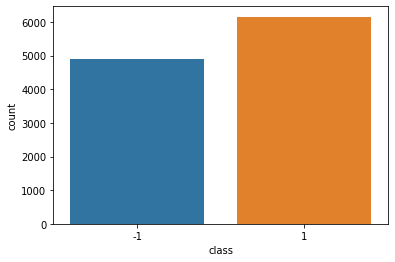

In [6]:
sns.countplot(x=data['class'])

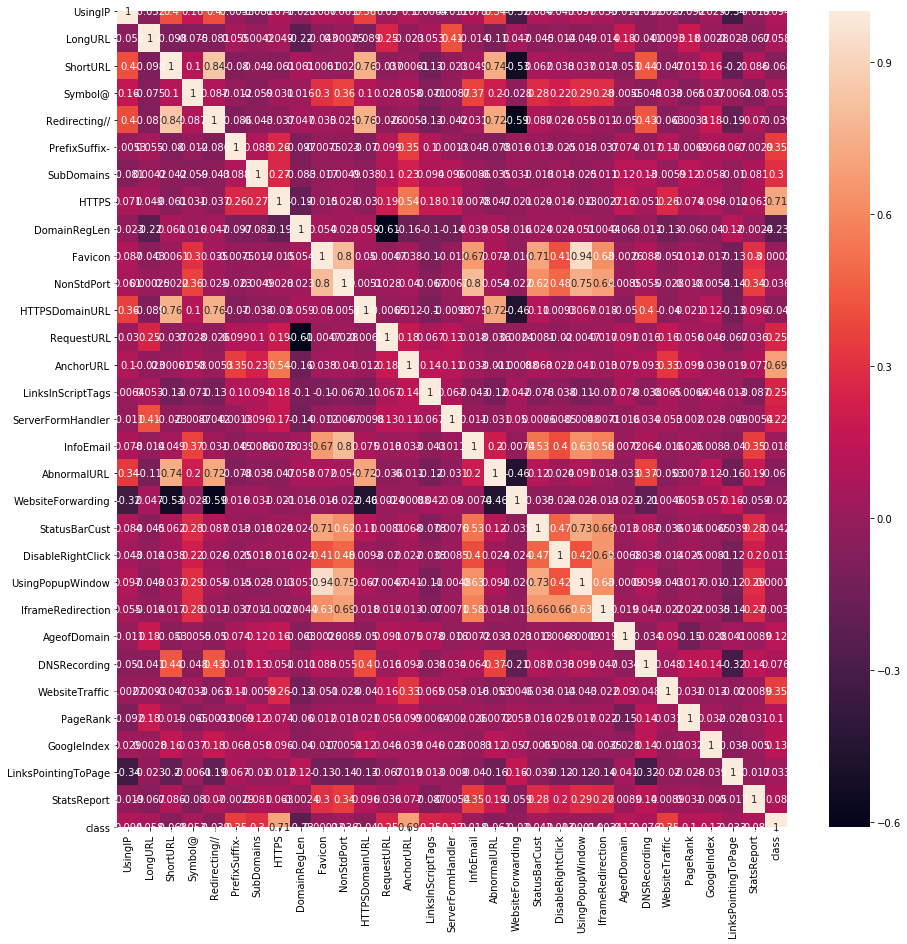

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [10]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
specificity = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))
    specificity.append(round(e,3))


# Linear Regression

In [11]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [12]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Linear Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Linear Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Linear Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Linear Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Linear Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Linear Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Linear Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Linear Regression : precision on test Data: {:.3f}".format(precision_score_test_log))
print()

specificity_score_train_log =  specificity_score(y_train,y_train_log)
specificity_score_test_log = specificity_score(y_test,y_test_log)
print("Linear Regression : specificity on training Data: {:.3f}".format(specificity_score_train_log))
print("Linear Regression : specificity on test Data: {:.3f}".format(specificity_score_test_log))

Linear Regression : Accuracy on training Data: 0.927
Linear Regression : Accuracy on test Data: 0.934

Linear Regression : f1_score on training Data: 0.935
Linear Regression : f1_score on test Data: 0.941

Linear Regression : Recall on training Data: 0.943
Linear Regression : Recall on test Data: 0.953

Linear Regression : precision on training Data: 0.927
Linear Regression : precision on test Data: 0.930

Linear Regression : specificity on training Data: 0.906
Linear Regression : specificity on test Data: 0.909


In [13]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Linear Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log,specificity_score_test_log)

# SVC

In [14]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [15]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))
print()

specificity_score_train_svc =  specificity_score(y_train,y_train_log)
specificity_score_test_svc = specificity_score(y_test,y_test_log)
print("Support Vector Machine : specificity on training Data: {:.3f}".format(specificity_score_train_svc))
print("Support Vector Machine : specificity on test Data: {:.3f}".format(specificity_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.953
Support Vector Machine : Accuracy on test Data: 0.951

Support Vector Machine : f1_score on training Data: 0.958
Support Vector Machine : f1_score on test Data: 0.957

Support Vector Machine : Recall on training Data: 0.969
Support Vector Machine : Recall on test Data: 0.973

Support Vector Machine : precision on training Data: 0.947
Support Vector Machine : precision on test Data: 0.941

Support Vector Machine : specificity on training Data: 0.906
Support Vector Machine : specificity on test Data: 0.909


In [16]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc,specificity_score_test_svc)

# Naive Bayes

In [17]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [18]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [19]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))
print()

specificity_score_train_nb =  specificity_score(y_train,y_train_log)
specificity_score_test_nb = specificity_score(y_test,y_test_log)
print("Naive Bayes Classifier : specificity on training Data: {:.3f}".format(specificity_score_train_nb))
print("Naive Bayes Classifier : specificity on test Data: {:.3f}".format(specificity_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995

Naive Bayes Classifier : specificity on training Data: 0.906
Naive Bayes Classifier : specificity on test Data: 0.909


In [20]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb,specificity_score_test_nb)

# Decision Tree

In [21]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [22]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [23]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))
print()

specificity_score_train_dt =  specificity_score(y_train,y_train_log)
specificity_score_test_dt = specificity_score(y_test,y_test_log)
print("Decision Tree : specificity on training Data: {:.3f}".format(specificity_score_train_dt))
print("Decision Tree : specificity on test Data: {:.3f}".format(specificity_score_test_dt))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.957

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.960

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964

Decision Tree : specificity on training Data: 0.906
Decision Tree : specificity on test Data: 0.909


In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree,specificity_score_test_dt)

# Random Forest

In [25]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [26]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))
print()

specificity_score_train_forest =  specificity_score(y_train,y_train_log)
specificity_score_test_forest = specificity_score(y_test,y_test_log)
print("Decision Tree : specificity on training Data: {:.3f}".format(specificity_score_train_forest))
print("Decision Tree : specificity on test Data: {:.3f}".format(specificity_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.969

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.972

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.976

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.964

Decision Tree : specificity on training Data: 0.906
Decision Tree : specificity on test Data: 0.909


In [28]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest,specificity_score_test_forest)

# Gradient Boosting

In [29]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [30]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [31]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

specificity_score_train_gbc =  specificity_score(y_train,y_train_log)
specificity_score_test_gbc = specificity_score(y_test,y_test_log)
print("Gradient Boosting Classifier : specificity on training Data: {:.3f}".format(specificity_score_train_gbc))
print("Gradient Boosting Classifier : specificity on test Data: {:.3f}".format(specificity_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966

Gradient Boosting Classifier : specificity on training Data: 0.906
Gradient Boosting Classifier : specificity on test Data: 0.909


In [32]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc,specificity_score_test_gbc)

# Hybrid LSD (Soft)

In [33]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = SVC(gamma='auto',probability=True)
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('svc', clf1), ('lr', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)

In [34]:
#predicting the target value from the model for the samples
y_train_hyd1 = eclf1.predict(X_train)
y_test_hyd1 = eclf1.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_hyd1 = metrics.accuracy_score(y_train,y_train_hyd1)
acc_test_hyd1 = metrics.accuracy_score(y_test,y_test_hyd1)
print("Hybrid LSD - SOFT : Accuracy on training Data: {:.3f}".format(acc_train_hyd1))
print("Hybrid LSD - SOFT : Accuracy on test Data: {:.3f}".format(acc_test_hyd1))
print()

f1_score_train_hyd1 = metrics.f1_score(y_train,y_train_hyd1)
f1_score_test_hyd1 = metrics.f1_score(y_test,y_test_hyd1)
print("Hybrid LSD - SOFT : f1_score on training Data: {:.3f}".format(f1_score_train_hyd1))
print("Hybrid LSD - SOFT : f1_score on test Data: {:.3f}".format(f1_score_test_hyd1))
print()

recall_score_train_hyd1 = metrics.recall_score(y_train,y_train_hyd1)
recall_score_test_hyd1 =  metrics.recall_score(y_test,y_test_hyd1)
print("Hybrid LSD - SOFT : Recall on training Data: {:.3f}".format(recall_score_train_hyd1))
print("Hybrid LSD - SOFT : Recall on test Data: {:.3f}".format(recall_score_test_hyd1))
print()

precision_score_train_hyd1 = metrics.precision_score(y_train,y_train_hyd1)
precision_score_test_hyd1 = metrics.precision_score(y_test,y_test_hyd1)
print("Hybrid LSD - SOFT : precision on training Data: {:.3f}".format(precision_score_train_hyd1))
print("Hybrid LSD - SOFT : precision on test Data: {:.3f}".format(precision_score_test_hyd1))
print()

specificity_score_train_hyd1 =  specificity_score(y_train,y_train_log)
specificity_score_test_hyd1 = specificity_score(y_test,y_test_log)
print("Hybrid LSD - SOFT : specificity on training Data: {:.3f}".format(specificity_score_train_hyd1))
print("Hybrid LSD - SOFT : specificity on test Data: {:.3f}".format(specificity_score_test_hyd1))

Hybrid LSD - SOFT : Accuracy on training Data: 0.967
Hybrid LSD - SOFT : Accuracy on test Data: 0.959

Hybrid LSD - SOFT : f1_score on training Data: 0.971
Hybrid LSD - SOFT : f1_score on test Data: 0.964

Hybrid LSD - SOFT : Recall on training Data: 0.977
Hybrid LSD - SOFT : Recall on test Data: 0.971

Hybrid LSD - SOFT : precision on training Data: 0.965
Hybrid LSD - SOFT : precision on test Data: 0.957

Hybrid LSD - SOFT : specificity on training Data: 0.906
Hybrid LSD - SOFT : specificity on test Data: 0.909


In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Hybrid LSD - SOFT',acc_test_hyd1,f1_score_test_hyd1,
             recall_score_train_hyd1,precision_score_train_hyd1,specificity_score_test_hyd1)

# Hybrid LSD (Hard)

In [37]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = SVC(gamma='auto',probability=True)
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
eclf2 = VotingClassifier(estimators=[('svc', clf1), ('lr', clf2), ('dt', clf3)], voting='hard')
eclf2.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(gamma='auto', probability=True)),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])

In [38]:
#predicting the target value from the model for the samples
y_train_hyd2 = eclf2.predict(X_train)
y_test_hyd2 = eclf2.predict(X_test)

In [39]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_hyd2 = metrics.accuracy_score(y_train,y_train_hyd2)
acc_test_hyd2 = metrics.accuracy_score(y_test,y_test_hyd2)
print("Hybrid LSD - HARD : Accuracy on training Data: {:.3f}".format(acc_train_hyd2))
print("Hybrid LSD - HARD : Accuracy on test Data: {:.3f}".format(acc_test_hyd2))
print()

f1_score_train_hyd2 = metrics.f1_score(y_train,y_train_hyd2)
f1_score_test_hyd2 = metrics.f1_score(y_test,y_test_hyd2)
print("Hybrid LSD - HARD : f1_score on training Data: {:.3f}".format(f1_score_train_hyd2))
print("Hybrid LSD - HARD : f1_score on test Data: {:.3f}".format(f1_score_test_hyd2))
print()

recall_score_train_hyd2 = metrics.recall_score(y_train,y_train_hyd2)
recall_score_test_hyd2 =  metrics.recall_score(y_test,y_test_hyd2)
print("Hybrid LSD - HARD : Recall on training Data: {:.3f}".format(recall_score_train_hyd2))
print("Hybrid LSD - HARD : Recall on test Data: {:.3f}".format(recall_score_test_hyd2))
print()

precision_score_train_hyd2 = metrics.precision_score(y_train,y_train_hyd2)
precision_score_test_hyd2 = metrics.precision_score(y_test,y_test_hyd2)
print("Hybrid LSD - HARD : precision on training Data: {:.3f}".format(precision_score_train_hyd2))
print("Hybrid LSD - HARD : precision on test Data: {:.3f}".format(precision_score_test_hyd2))
print()

specificity_score_train_hyd2 =  specificity_score(y_train,y_train_log)
specificity_score_test_hyd2 = specificity_score(y_test,y_test_log)
print("Hybrid LSD - HARD : specificity on training Data: {:.3f}".format(specificity_score_train_hyd2))
print("Hybrid LSD - HARD : specificity on test Data: {:.3f}".format(specificity_score_test_hyd2))

Hybrid LSD - HARD : Accuracy on training Data: 0.950
Hybrid LSD - HARD : Accuracy on test Data: 0.950

Hybrid LSD - HARD : f1_score on training Data: 0.956
Hybrid LSD - HARD : f1_score on test Data: 0.956

Hybrid LSD - HARD : Recall on training Data: 0.967
Hybrid LSD - HARD : Recall on test Data: 0.970

Hybrid LSD - HARD : precision on training Data: 0.945
Hybrid LSD - HARD : precision on test Data: 0.942

Hybrid LSD - HARD : specificity on training Data: 0.906
Hybrid LSD - HARD : specificity on test Data: 0.909


In [40]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Hybrid LSD - HARD',acc_test_hyd2,f1_score_test_hyd2,
             recall_score_train_hyd2,precision_score_train_hyd2,specificity_score_test_hyd2)

Canopy Feature

In [41]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

# LSD with Hyperparameter GirdCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
eclf = VotingClassifier(estimators=[ 
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ], voting='soft')

In [46]:
params = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}

In [47]:
grid = GridSearchCV(eclf,params,cv=5,scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('svm',
                                                     SVC(probability=True)),
                                                    ('lr',
                                                     LogisticRegression()),
                                                    ('dt',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={'lr__C': [1.0, 100.0], 'svm__C': [2, 3, 4]},
             scoring='neg_log_loss')

In [48]:
#predicting the target value from the model for the samples
y_train_hyd3 = grid.predict(X_train)
y_test_hyd3 = grid.predict(X_test)

In [49]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_hyd3 = metrics.accuracy_score(y_train,y_train_hyd3)
acc_test_hyd3 = metrics.accuracy_score(y_test,y_test_hyd3)
print("Hybrid LSD : Accuracy on training Data: {:.3f}".format(acc_train_hyd3))
print("Hybrid LSD : Accuracy on test Data: {:.3f}".format(acc_test_hyd3))
print()

f1_score_train_hyd3 = metrics.f1_score(y_train,y_train_hyd3)
f1_score_test_hyd3 = metrics.f1_score(y_test,y_test_hyd3)
print("Hybrid LSD : f1_score on training Data: {:.3f}".format(f1_score_train_hyd3))
print("Hybrid LSD : f1_score on test Data: {:.3f}".format(f1_score_test_hyd3))
print()

recall_score_train_hyd3 = metrics.recall_score(y_train,y_train_hyd3)
recall_score_test_hyd3 =  metrics.recall_score(y_test,y_test_hyd3)
print("Hybrid LSD : Recall on training Data: {:.3f}".format(recall_score_train_hyd3))
print("Hybrid LSD : Recall on test Data: {:.3f}".format(recall_score_test_hyd3))
print()

precision_score_train_hyd3 = metrics.precision_score(y_train,y_train_hyd3)
precision_score_test_hyd3 = metrics.precision_score(y_test,y_test_hyd3)
print("Hybrid LSD : precision on training Data: {:.3f}".format(precision_score_train_hyd3))
print("Hybrid LSD : precision on test Data: {:.3f}".format(precision_score_test_hyd3))
print()

specificity_score_train_hyd3 =  specificity_score(y_train,y_train_log)
specificity_score_test_hyd3 = specificity_score(y_test,y_test_log)
print("Hybrid LSD : specificity on training Data: {:.3f}".format(specificity_score_train_hyd3))
print("Hybrid LSD : specificity on test Data: {:.3f}".format(specificity_score_test_hyd3))

Hybrid LSD : Accuracy on training Data: 1.000
Hybrid LSD : Accuracy on test Data: 1.000

Hybrid LSD : f1_score on training Data: 1.000
Hybrid LSD : f1_score on test Data: 1.000

Hybrid LSD : Recall on training Data: 1.000
Hybrid LSD : Recall on test Data: 1.000

Hybrid LSD : precision on training Data: 1.000
Hybrid LSD : precision on test Data: 1.000

Hybrid LSD : specificity on training Data: 0.449
Hybrid LSD : specificity on test Data: 0.426


In [50]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Hybrid LSD',acc_test_hyd3,f1_score_test_hyd3,
             recall_score_train_hyd3,precision_score_train_hyd3,specificity_score_test_hyd3)

# Stacking Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [10]:
estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10)),
...     ('mlp', MLPClassifier(random_state=1, max_iter=300))
... ]

In [11]:
clf = StackingClassifier(
...     estimators=estimators, final_estimator=LGBMClassifier()
... )

In [12]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10)),
                               ('mlp',
                                MLPClassifier(max_iter=300, random_state=1))],
                   final_estimator=LGBMClassifier())

In [13]:
#predicting the target value from the model for the samples
y_train_stac = clf.predict(X_train)
y_test_stac = clf.predict(X_test)

In [16]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_stac = metrics.accuracy_score(y_train,y_train_stac)
acc_test_stac = metrics.accuracy_score(y_test,y_test_stac)
#print("Stacking Classifier : Accuracy on training Data: {:.3f}".format(acc_train_stac))
#print("Stacking Classifier : Accuracy on test Data: {:.3f}".format(acc_test_stac))
#print()

f1_score_train_stac = metrics.f1_score(y_train,y_train_stac)
f1_score_test_stac = metrics.f1_score(y_test,y_test_stac)
#print("Stacking Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_stac))
#print("Stacking Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_stac))
#print()

recall_score_train_stac = metrics.recall_score(y_train,y_train_stac)
recall_score_test_stac =  metrics.recall_score(y_test,y_test_stac)
#print("Stacking Classifier : Recall on training Data: {:.3f}".format(recall_score_train_stac))
#print("Stacking Classifier : Recall on test Data: {:.3f}".format(recall_score_test_stac))
#print()

precision_score_train_stac = metrics.precision_score(y_train,y_train_stac)
precision_score_test_stac = metrics.precision_score(y_test,y_test_stac)
#print("Stacking Classifier : precision on training Data: {:.3f}".format(precision_score_train_stac))
#print("Stacking Classifier : precision on test Data: {:.3f}".format(precision_score_test_stac))
#print()

specificity_score_train_stac =  specificity_score(y_train,y_train_stac)
specificity_score_test_stac = specificity_score(y_test,y_test_stac)
#print("Stacking Classifier : specificity on training Data: {:.3f}".format(specificity_score_train_stac))
#print("Stacking Classifier : specificity on test Data: {:.3f}".format(specificity_score_test_stac))

In [57]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Stacking Classifier',acc_test_stac,f1_score_test_stac,
             recall_score_train_stac,precision_score_train_stac,specificity_score_test_stac)

# Accuracy Comparison

In [58]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'Specificity': specificity
                      })

In [59]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision,Specificity
0,Linear Regression,0.934,0.941,0.943,0.927,0.909
1,Support Vector Machine,0.951,0.957,0.969,0.947,0.909
2,Naive Bayes Classifier,0.605,0.454,0.292,0.997,0.909
3,Decision Tree,0.957,0.962,0.991,0.993,0.909
4,Random Forest,0.969,0.972,0.993,0.990,0.909
5,Gradient Boosting Classifier,0.974,0.977,0.994,0.986,0.909
6,Hybrid LSD - SOFT,0.959,0.964,0.977,0.965,0.909
7,Hybrid LSD - HARD,0.950,0.956,0.967,0.945,0.909
8,Hybrid LSD,1.000,1.000,1.000,1.000,0.426
9,Stacking Classifier,1.000,1.000,1.000,1.000,0.426


# Graph

In [60]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy Comparison

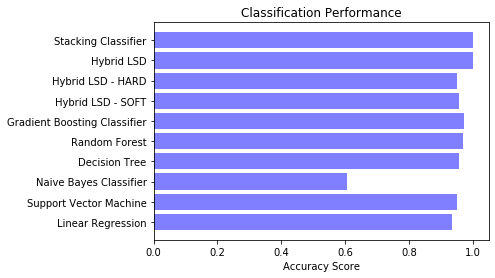

In [61]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

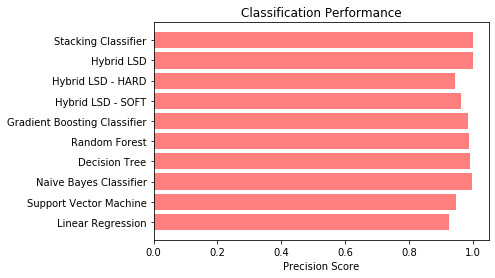

In [62]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall Score

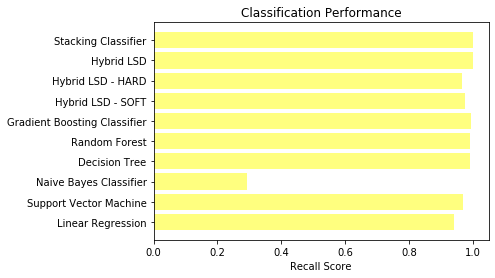

In [63]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

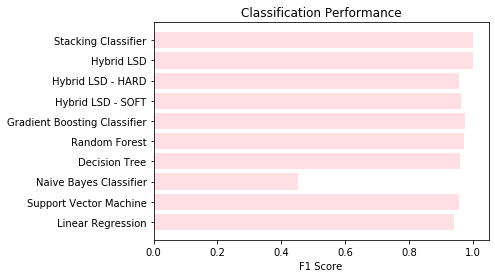

In [64]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1_score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [19]:
import pickle

# dump information to that file
pickle.dump(clf, open('model.pkl', 'wb'))